In [1]:
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 데이터 불러오기
df = pd.read_csv('bitcoin_data.csv')
df.dropna(inplace=True)

# 이동평균 계산
df['ROC'] = ta.ROC(df['close'], timeperiod=10)
df.dropna(inplace=True)

# 입력 데이터와 타겟 값 생성
X = df[['ROC']].values
Y = df['close'].values

# 데이터 스케일링
scaler = MinMaxScaler()

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.2, shuffle=False,
                                                    random_state=0)

# X 학습 테스트
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Y 학습 테스트
Y_train = scaler.fit_transform(Y_train.reshape(-1, 1)).flatten()
Y_test = scaler.fit_transform(Y_test.reshape(-1, 1)).flatten()

# 전체 비교용 X Y
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y.reshape(-1, 1)).flatten()

# 모델 구축
model = LinearRegression()

# 모델 학습
model.fit(X_train, Y_train)

# 테스트 데이터 예측
Y_pred = model.predict(X_test)
Y_pred_all = model.predict(X_scaled)

# 예측 결과 역스케일링
Y_pred_scaled = scaler.inverse_transform(Y_pred.reshape(-1, 1)).flatten()
Y_pred_scaled_all = scaler.inverse_transform(Y_pred_all.reshape(-1, 1)).flatten()
Y_test_scaled = scaler.inverse_transform(Y_scaled.reshape(-1, 1)).flatten()

print(Y_pred_scaled)

[24984561.32467761 24577748.61336747 24988028.40138616 25113821.79962526
 24617654.33499844 25186107.18728299 25106507.52433174 24647291.78702122
 24527893.40306355 24737176.7592517  25053982.89945851 24875735.40540039
 25512492.65482697 24243053.25472477 24611250.42249251 24075553.34982528
 23335692.60865857 22357201.39236941 22492506.51012637 22218342.63695491
 21840861.18758097 22044520.65871869 21794794.01441683 22906423.92090905
 22521870.02154886 22674619.96168435 22424662.2119416  24314478.6120961
 23898036.13275702 24286617.64471585 25061258.63444269 24435306.92433993
 24324936.8030329  24017052.91374354 24533662.27293549 24193485.42364841
 25160426.52733061 24606321.8359958  25952508.53578542 25988548.36909264
 24752387.3564027  25600641.62558438 25198925.18447578 25180610.58465323
 25321471.18522028 26368880.57124859 26218422.65730552 25706990.26735134
 24660895.12693409 24254485.15820214 24838632.69942953 23644943.78474244
 21575050.69229284 21322568.13641618 21484606.824465

In [3]:
r2_train = r2_score(Y_train, model.predict(X_train))
r2_test = r2_score(Y_test, model.predict(X_test))

print(f"[r2_score] train : {r2_train} / test : {r2_test}")

# mse
mse = mean_squared_error(Y_test, Y_pred)
# rmse
rmse = np.sqrt(mse)

print(f'[MSE] : {mse:.3f}\n[RMSE] : {rmse:.3f}')

[r2_score] train : 0.0022962893995893685 / test : -0.08219535153437163
[MSE] : 0.052
[RMSE] : 0.229


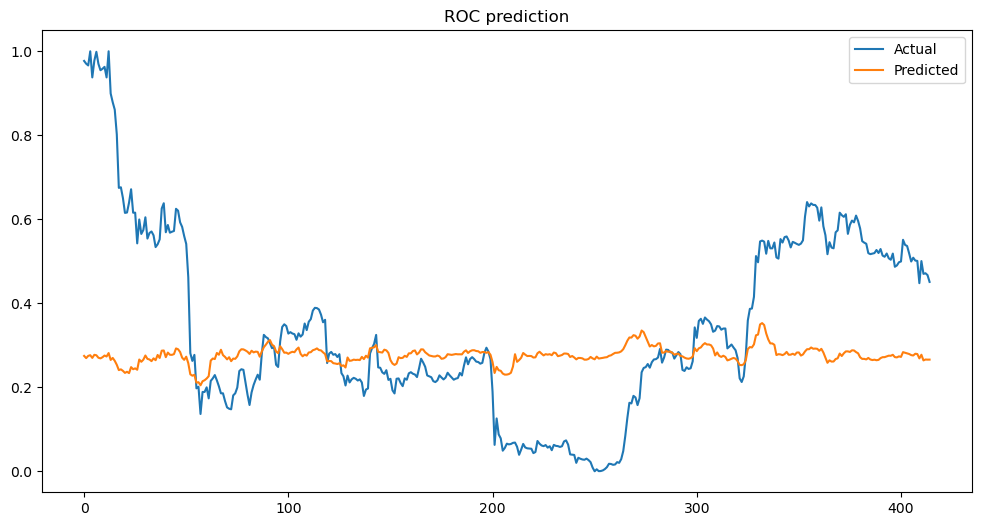

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(Y_test, label='Actual')
plt.plot(Y_pred, label='Predicted')
plt.title('ROC prediction')
plt.legend()
plt.show()